In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("onyx march data.csv")
df

,Order NO,Order Date,Month/Yr,Day of Week,Pie Flavor,Quantity,Cost,Slice Or Whole Pie,Pre-Order/In-Store Purchase,Organic?
0,10001,19-12-2019,01-12-2019,Thursday,Apple,5,12.5,Slice,Pre-Order,No
1,10002,19-12-2019,01-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,Yes
2,10003,19-12-2019,01-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,No
3,10004,19-12-2019,01-12-2019,Thursday,Apple,4,80.0,Whole,Pre-Order,No
4,10005,19-12-2019,01-12-2019,Thursday,Apple,2,40.0,Whole,In-Store,No
...,...,...,...,...,...,...,...,...,...,...
2768,12769,27-03-2021,01-03-2021,Saturday,Strawberry Rhubarb,3,60.0,Whole,Pre-Order,Yes
2769,12770,27-03-2021,01-03-2021,Saturday,Cherry,1,20.0,Whole,In-Store,Yes
2770,12771,27-03-2021,01-03-2021,Saturday,Strawberry Rhubarb,4,10.0,Slice,In-Store,Yes
2771,12772,27-03-2021,01-03-2021,Saturday,Cherry,3,60.0,Whole,Pre-Order,Yes


# Understanding and preparation of the dataset


In [3]:
df.head()

,Order NO,Order Date,Month/Yr,Day of Week,Pie Flavor,Quantity,Cost,Slice Or Whole Pie,Pre-Order/In-Store Purchase,Organic?
0,10001,19-12-2019,01-12-2019,Thursday,Apple,5,12.5,Slice,Pre-Order,No
1,10002,19-12-2019,01-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,Yes
2,10003,19-12-2019,01-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,No
3,10004,19-12-2019,01-12-2019,Thursday,Apple,4,80.0,Whole,Pre-Order,No
4,10005,19-12-2019,01-12-2019,Thursday,Apple,2,40.0,Whole,In-Store,No


In [4]:
df.tail()

,Order NO,Order Date,Month/Yr,Day of Week,Pie Flavor,Quantity,Cost,Slice Or Whole Pie,Pre-Order/In-Store Purchase,Organic?
2768,12769,27-03-2021,01-03-2021,Saturday,Strawberry Rhubarb,3,60.0,Whole,Pre-Order,Yes
2769,12770,27-03-2021,01-03-2021,Saturday,Cherry,1,20.0,Whole,In-Store,Yes
2770,12771,27-03-2021,01-03-2021,Saturday,Strawberry Rhubarb,4,10.0,Slice,In-Store,Yes
2771,12772,27-03-2021,01-03-2021,Saturday,Cherry,3,60.0,Whole,Pre-Order,Yes
2772,12773,27-03-2021,01-03-2021,Saturday,Cherry,5,100.0,Whole,In-Store,Yes


In [5]:
df.shape

(2773, 10)

In [6]:
df.describe()

,Order NO,Quantity,Cost
count,2773.000000,2773.000000,2773.000000
mean,11387.000000,3.005049,34.952218
std,800.640473,1.413949,33.093087
min,10001.000000,1.000000,2.500000
25%,10694.000000,2.000000,7.500000
50%,11387.000000,3.000000,20.000000
75%,12080.000000,4.000000,60.000000
max,12773.000000,5.000000,100.000000


### Checking for missing values


In [7]:
df.isnull().sum()

Order NO                       0
Order Date                     0
Month/Yr                       0
Day of Week                    0
Pie Flavor                     0
Quantity                       0
Cost                           0
Slice Or Whole Pie             0
Pre-Order/In-Store Purchase    0
Organic?                       0
dtype: int64

### There are no missing values

In [8]:
df["Pie Flavor"].value_counts()


Apple                 702
Strawberry Rhubarb    636
Pumpkin               506
Cherry                321
Fudge                 312
Blueberry             208
Other                  88
Name: Pie Flavor, dtype: int64

### Correlation between variables


In [9]:
df.corr()

,Order NO,Quantity,Cost
Order NO,1.000000,0.028052,0.011528
Quantity,0.028052,1.000000,0.479469
Cost,0.011528,0.479469,1.000000


<AxesSubplot:>

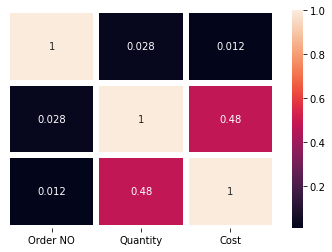

In [10]:
sns.heatmap(data=df.corr(),yticklabels=False,linewidths=5,annot=True)

# Data Visualization

### Determining the most purchased pies

In [11]:
a=df["Pie Flavor"].value_counts()
a

Apple                 702
Strawberry Rhubarb    636
Pumpkin               506
Cherry                321
Fudge                 312
Blueberry             208
Other                  88
Name: Pie Flavor, dtype: int64

In [12]:
keys=a.keys().to_list()
counts=a.to_list()

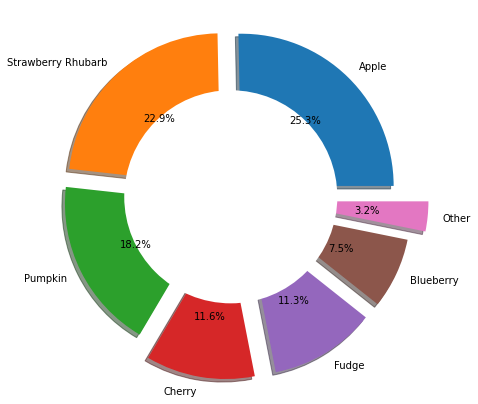

In [13]:
myexplode = [0.1, 0.1, 0.1, 0.2,0.2,0.2,0.3]
fig = plt.figure(figsize =(10, 7))
plt.pie(x=counts,data=df,explode=myexplode,labels=keys,autopct='%1.1f%%',shadow=True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### Apple pies are the most purchased pies

### Determining how customers want the pies whether as a whole or slices

<AxesSubplot:xlabel='Pie Flavor', ylabel='count'>

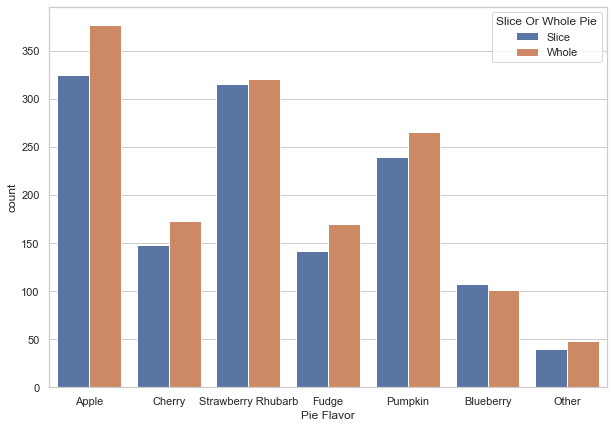

In [14]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize =(10, 7))
sns.countplot(x="Pie Flavor",data=df,hue="Slice Or Whole Pie")

In [15]:
# Only for Blueberry pies people prefer sliced and prefer whole for all the other pies

### Determining how customers want the pies whether Organic or Non-Organic.

<AxesSubplot:xlabel='Pie Flavor', ylabel='count'>

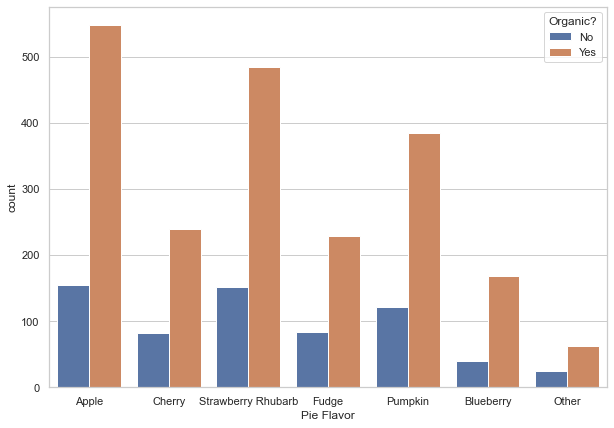

In [16]:
fig = plt.figure(figsize =(10, 7))
sns.countplot(x="Pie Flavor",data=df,hue="Organic?")

In [17]:
# People mostly  prefer organic pies

<AxesSubplot:xlabel='Organic?', ylabel='count'>

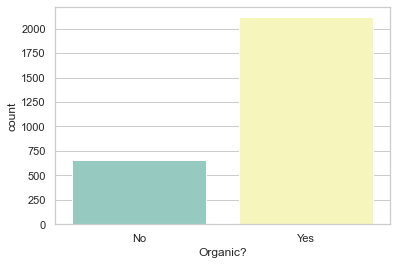

In [18]:
sns.countplot(x="Organic?",data=df,palette="Set3")

# Determining the sale in a week

<AxesSubplot:xlabel='count', ylabel='Day of Week'>

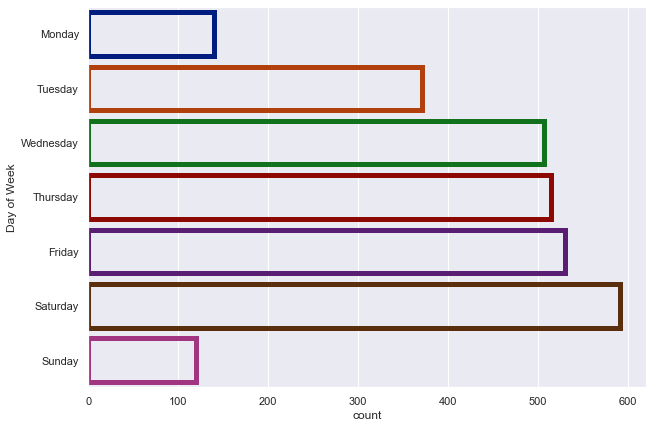

In [19]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize =(10, 7))
sns.countplot(y="Day of Week",data=df,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],facecolor=(0, 0, 0, 0),linewidth=5,
                   edgecolor=sns.color_palette("dark", 7))

<AxesSubplot:xlabel='Pre-Order/In-Store Purchase', ylabel='count'>

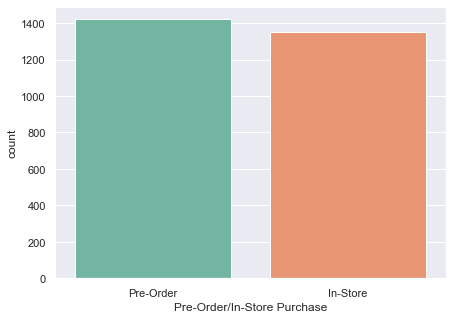

In [20]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize =(7, 5))
sns.countplot(x="Pre-Order/In-Store Purchase",data=df,palette='Set2')


In [21]:
# pre-order is done more than In-store purchase

In [22]:
df

,Order NO,Order Date,Month/Yr,Day of Week,Pie Flavor,Quantity,Cost,Slice Or Whole Pie,Pre-Order/In-Store Purchase,Organic?
0,10001,19-12-2019,01-12-2019,Thursday,Apple,5,12.5,Slice,Pre-Order,No
1,10002,19-12-2019,01-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,Yes
2,10003,19-12-2019,01-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,No
3,10004,19-12-2019,01-12-2019,Thursday,Apple,4,80.0,Whole,Pre-Order,No
4,10005,19-12-2019,01-12-2019,Thursday,Apple,2,40.0,Whole,In-Store,No
...,...,...,...,...,...,...,...,...,...,...
2768,12769,27-03-2021,01-03-2021,Saturday,Strawberry Rhubarb,3,60.0,Whole,Pre-Order,Yes
2769,12770,27-03-2021,01-03-2021,Saturday,Cherry,1,20.0,Whole,In-Store,Yes
2770,12771,27-03-2021,01-03-2021,Saturday,Strawberry Rhubarb,4,10.0,Slice,In-Store,Yes
2771,12772,27-03-2021,01-03-2021,Saturday,Cherry,3,60.0,Whole,Pre-Order,Yes


In [23]:
## The plot shows that more sales are done during saturday

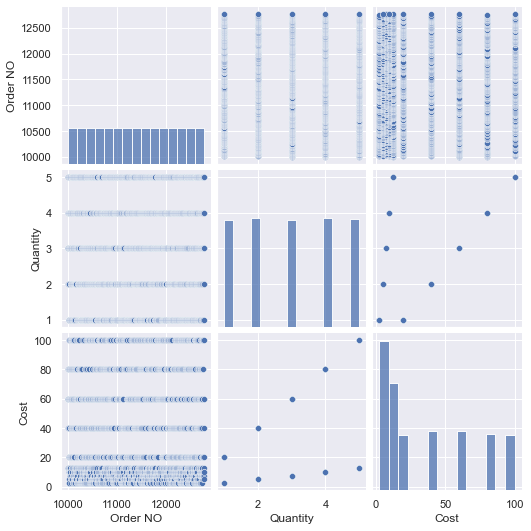

In [24]:
sns.pairplot(data=df)

In [25]:
df1=df

In [26]:
# Formatting date
df1['Date']=pd.to_datetime(df1['Month/Yr'],dayfirst=True)
df1['year'], df1['month'] = df1['Date'].dt.year, df1['Date'].dt.month
df.drop(columns="Month/Yr",axis=1,inplace=True)
df1

,Order NO,Order Date,Day of Week,Pie Flavor,Quantity,Cost,Slice Or Whole Pie,Pre-Order/In-Store Purchase,Organic?,Date,year,month
0,10001,19-12-2019,Thursday,Apple,5,12.5,Slice,Pre-Order,No,2019-12-01,2019,12
1,10002,19-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,Yes,2019-12-01,2019,12
2,10003,19-12-2019,Thursday,Apple,3,60.0,Whole,In-Store,No,2019-12-01,2019,12
3,10004,19-12-2019,Thursday,Apple,4,80.0,Whole,Pre-Order,No,2019-12-01,2019,12
4,10005,19-12-2019,Thursday,Apple,2,40.0,Whole,In-Store,No,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2768,12769,27-03-2021,Saturday,Strawberry Rhubarb,3,60.0,Whole,Pre-Order,Yes,2021-03-01,2021,3
2769,12770,27-03-2021,Saturday,Cherry,1,20.0,Whole,In-Store,Yes,2021-03-01,2021,3
2770,12771,27-03-2021,Saturday,Strawberry Rhubarb,4,10.0,Slice,In-Store,Yes,2021-03-01,2021,3
2771,12772,27-03-2021,Saturday,Cherry,3,60.0,Whole,Pre-Order,Yes,2021-03-01,2021,3


# Determining the Pie sales during each month

In [27]:
b=df["month"].value_counts()
b.sort_index(axis=0,ascending=True, inplace=True)
keys=b.keys().to_list()
counts1=b.to_list()
Month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']


([<matplotlib.patches.Wedge at 0x1bb78d9bb50>,
 [Text(1.0786963338531697, 0.21543959555228337, 'Jan'),
  Text(1.0052059532944688, 0.6554090260755937, 'Feb'),
  Text(0.5033273668607761, 0.9780907737878923, 'Mar'),
  Text(-0.35163325712974347, 1.147324737151748, 'Apr'),
  Text(-0.905472811817623, 0.6245950584651528, 'May'),
  Text(-1.17909481195062, 0.22301440408891254, 'Jun'),
  Text(-1.0427610157794658, -0.3502134548679946, 'Jul'),
  Text(-0.7757910886046926, -0.915504334692931, 'Aug'),
  Text(-0.32709316320986476, -1.0502428588575907, 'Sept'),
  Text(0.23035710617880784, -1.1776823016556401, 'Oct'),
  Text(0.8323253362916515, -0.7191901935976251, 'Nov'),
  Text(1.1805835155857367, -0.2149943318490576, 'Dec')],
 [Text(0.5883798184653652, 0.11751250666488182, '6.3%'),
  Text(0.5863701394217735, 0.3823219318774296, '5.8%'),
  Text(0.2745422001058778, 0.5335040584297593, '10.6%'),
  Text(-0.20511939999235032, 0.6692727633385196, '14.0%'),
  Text(-0.49389426099143063, 0.3406882137082652, '

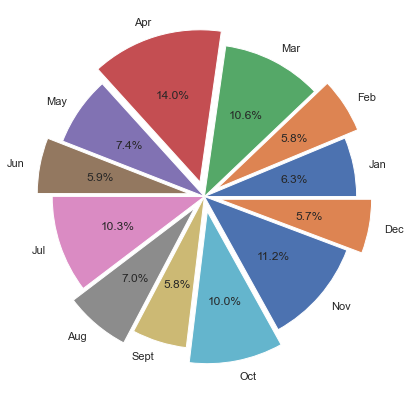

In [28]:
myexplode = [0,0.1,0, 0.1,0, 0.1,0, 0.1,0,0.1,0,0.1]
fig = plt.figure(figsize =(10, 7))
plt.pie(x=counts1,data=df,labels =Month,explode=myexplode,autopct='%1.1f%%')

#### we can infer that more sales are done during the month of April

In [29]:
df.value_counts("year")

year
2021    1314
2020    1117
2019     342
dtype: int64

 There is a drastic increase of  226.608%  in sales during the year 2020 
  and  increase of  17.6%  during the year 2021

<AxesSubplot:xlabel='year', ylabel='count'>

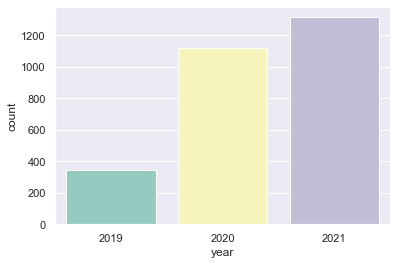

In [30]:
sns.countplot(x="year",data=df,palette="Set3")